<a href="https://colab.research.google.com/github/ajinkyatalekar/LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Multiple Variables

### Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Doing the regression
The *linearRegression* class is where all the learning and predicting will take place.  
a. init initialises all the required variables.  
b. train changes *w* and *b* as needed for specified iterations to bring the result as close as it can.  
c. predict provides an answer for provided values from the trained model.


In [2]:
class linearRegression:
    def __init__(self, features = 1, learningRate = 0.002, iterations = 1000):
        self.learningRate = learningRate
        self.iterations = iterations
        self.features = features
        self.w = [1 for i in range(self.features)]
        self.b = 0
        pass
    
    def train(self, X, y):
        for iterations in range(self.iterations):

            dW = [0 for i in range(self.features)]
            dB = 0
            
            for i in range(len(y)):
                yPred = np.dot(X[i], self.w) + self.b
                for j in range(len(X[0])):
                    dW[j] += (2 / len(y)) * X[i, j] * (yPred - y[i])
                dB += (2 / len(y)) * (yPred - y[i])
            
            self.b -= self.learningRate * dB
            for i in range(len(dW)):
                self.w[i] -= self.learningRate * dW[i]
        pass

    def predict(self, X):
        y = []
        for i in range(len(X)):
            y.append(np.dot(X[i], self.w) + self.b)
        return y

### Running the model
Import datasets to get sklearn for values to train the model with,
then train and predict.

In [3]:
# Generating & splitting data
from sklearn import datasets
from sklearn.model_selection import learning_curve, train_test_split
X, y = datasets.make_regression(n_samples=200, n_features=5, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Regression
lr =  linearRegression(features = 5)
lr.train(X_train, y_train)
predictions = lr.predict(X_test)

### Evaluating the model
These functions provide ways to determine the correctness of the trained model.

In [4]:
def mean_squared_error(y_true, y_pred):
    mse = 0
    for i in range(len(y_true)):
        mse += (y_pred[i]-y_true[i])**2 / len(y_true)
    return mse

def r2_score(y_true, y_pred):
    yMean = np.mean(y_true)
    num = 0
    den = 0

    for i in range(len(y_true)):
        num += (y_true[i] - y_pred[i])**2
        den += (y_true[i] - yMean)**2

    r2 = 1 - num / den
    return r2

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

accu = r2_score(y_test, predictions)
print("Accuracy:", accu)

MSE: 468.27311285272
Accuracy: 0.9568104361688655


### Visualising the data
Using matplotlib to see how the dependant variable changes with respect to the changes in all the features.

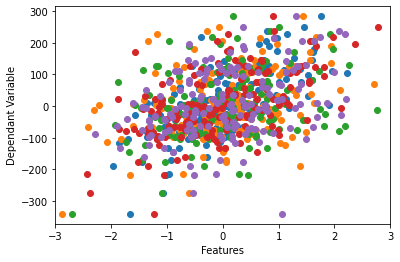

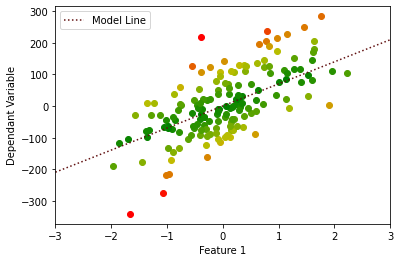

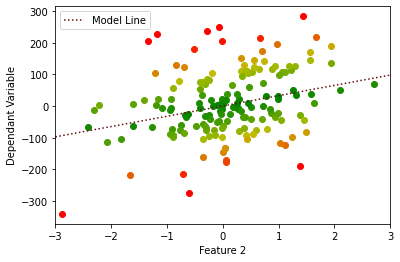

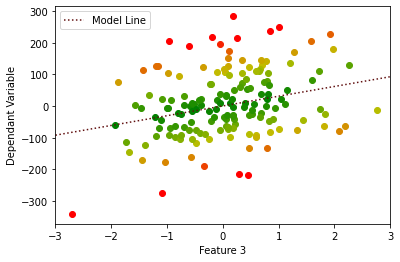

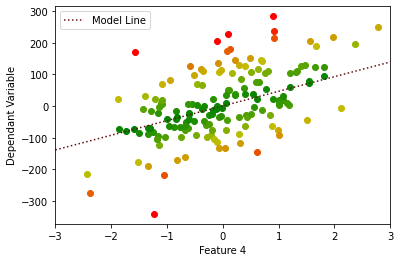

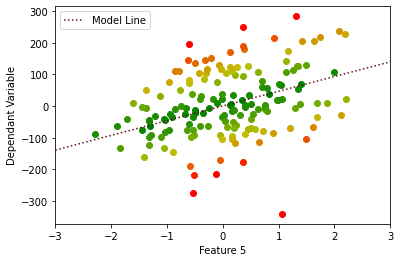

In [9]:
# This function returns appropriate colors for the scatterplot depending on the error from model's calculations
def colorByDist(x, y, feature, mse): 
    err = mse**(1/2)
    diff = abs(lr.w[feature] * x + lr.b - y)

    index = round(30 * diff / (err * 10))
    if (index >= 30):
        index = 29

    colors = ['green', '#098400', '#138900', '#1d8d00', '#289200', '#349600', '#409a00', '#4d9f00', '#5aa300', '#68a700', '#76ac00', '#86b000', '#95b500', '#a6b900', '#b7bd00', '#c2bb00', '#c6b200', '#caa800', '#cf9d00', '#d39200', '#d88600', '#dc7900', '#e06c00', '#e55f00', '#e95000', '#ed4200', '#f23200', '#f62200', '#fb1100', 'red']
    return str(colors[index])

# Plots all the features on the same graph
def plotAll(xArr, yArr):
    for i in range(len(xArr[0])):
        x = np.linspace(-3,3,200)
        plt.scatter(xArr[:,i], yArr)
        
        plt.xlabel("Features")
        plt.ylabel("Dependant Variable")
        plt.xlim(-3,3)
    plt.show()

# Plots the features separately with their respective least error lines generated by the algorithm
def plot(xArr, yArr, mse):
    for i in range(len(xArr[0])):
        for j in range(len(xArr)):
            plt.scatter(xArr[j, i], yArr[j], c = colorByDist(xArr[j,i], yArr[j], i, mse))

        x = np.linspace(-3,3,200)
        y = (lr.w[i]*x) + (lr.b/lr.features)
        plt.plot(x, y, color = '#611010', linestyle = 'dotted')
        
        plt.xlabel("Feature " + str(i+1))
        plt.ylabel("Dependant Variable")
        plt.xlim(-3,3)
        plt.legend(['Model Line'], loc ="upper left")
        plt.show()

# Calling the functions
plotAll(X_train, y_train)
plot(X_train, y_train, mse) # Here mse is the mean square error we got while evaluating the model